In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from src.models import SIRM, SIRT, SIRV
#from helps import *
from src.utils.visualization.used import *

In [2]:
NB = 100
NP = 100

homophilic_tendency = {"m": 0, "M": 6, "n": NB}
pol_range = {"m": 0, "M": 1, "n": NP}

P = [0.1, 0.5, 0.9]


In [3]:
# visualization parameters

colors_X = ['#66c2a4', '#238b45','#00441b']  # fixed polarization
colors_Y = ['#67001f', '#e7298a', '#df65b0'] # fixed homophily
my_map = discretize_cmaps("hot_r",21)
my_map.set_bad(color='gray')
cmaps = [my_map]
contour_values = [[0.25, 0.5, 0.75]]
contour_colors = [['#000','#000','#000']]
final_params={
        'Lx': Lx,  # Figure width in inches
        'Ly': Ly,  # Figure height in inches
        'xticks': [0, 0.5, 1.0],
        'yticks': [0, 3, 6],
        'xlim': [0, 1],
        'ylim': [0, 6]
    }

In [4]:
temp = read_json("./parameters.json")
mus, taus, xis, PARAMS = temp["mus"], temp["taus"], temp["xis"], temp["PARAMS"]

In [5]:
figsize = [from_mm_to_in(45), from_mm_to_in(45)]

In [6]:
path_1_M = "figures/Fig_1/I(pol,hom)_M.pdf"

NB_final = 100

pol_range = {"m": 0, "M": 1, "n": NB_final}
homophilic_tendency = {"m": 0, "M": 6, "n": NB_final}


temp = PARAMS["beta_M"]
PARAMS["beta_M"] = 0.2

PARAMS["fixed_mean"] = 0.5
RM_1 = sweep_two_parameters(
    model_module=SIRM,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=PARAMS,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)
PARAMS["beta_M"] = temp


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


{'x_values': Array([0.005     , 0.015     , 0.025     , 0.035     , 0.045     ,
       0.055     , 0.06500001, 0.075     , 0.085     , 0.09500001,
       0.105     , 0.115     , 0.125     , 0.135     , 0.14500001,
       0.155     , 0.165     , 0.17500001, 0.185     , 0.19500001,
       0.20500001, 0.215     , 0.22500001, 0.23500001, 0.245     ,
       0.255     , 0.26500002, 0.275     , 0.285     , 0.29500002,
       0.305     , 0.315     , 0.32500002, 0.335     , 0.345     ,
       0.35500002, 0.365     , 0.375     , 0.38500002, 0.395     ,
       0.405     , 0.41500002, 0.425     , 0.435     , 0.44500002,
       0.455     , 0.465     , 0.47500002, 0.485     , 0.495     ,
       0.505     , 0.515     , 0.52500004, 0.535     , 0.545     ,
       0.555     , 0.565     , 0.57500005, 0.58500004, 0.59499997,
       0.605     , 0.61500007, 0.625     , 0.635     , 0.64500004,
       0.65500003, 0.665     , 0.675     , 0.685     , 0.69500005,
       0.70500004, 0.715     , 0.725     , 0.7350

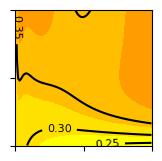

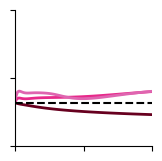

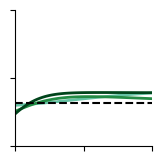

In [8]:
matrix_data, plot_params = analyze_matrix(RM_1, "infections")
print(plot_params)
# Create the plot (using unpacked parameters)
fig_R_M_1 = plot_matrix(
    data=matrix_data,
    **plot_params,  # Unpack all the extracted parameters
    cmap=cmaps[0],  # Using the first colormap
    figsize = figsize,
    contour_values = [0.25, 0.3, 0.35],
    xticks = [0,0.5,1],
    yticks = [0,3,6],
    save_path = path_1_M
)

# Plot for fixed homophily values (horizontal slices)
fig1 = plot_slices(
    matrix_data=matrix_data,
    plot_params=plot_params,
    slice_values=[0, 3, 6],  # homophily values 
    slice_dimension="y",
    model_module=SIRM,        # For baseline calculation
    model_params=PARAMS,      # For baseline calculation
    colors=colors_Y,
    output_path="figures/Fig_1/I(pol)_M.pdf",
    figsize = figsize,
)


# Plot for fixed polarization values (vertical slices)
fig2 = plot_slices(
    matrix_data=matrix_data,
    plot_params=plot_params,
    slice_values=[0.1, 0.5, 0.9],  # polarization values
    slice_dimension="x", 
    model_module=SIRM,
    model_params=PARAMS,
    colors=colors_X,
    output_path="figures/Fig_1/I(hom)_M.pdf",
    figsize = figsize,
)


In [73]:
path_1_T = "figures/Fig_1/I(pol,hom)_T.pdf"


PARAMS["fixed_mean"] = 0.5
RT_1 = sweep_two_parameters(
    model_module=SIRT,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=PARAMS,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)


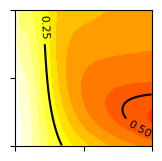

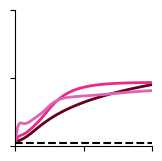

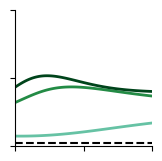

In [74]:
matrix_data_T1, plot_params_T1 = analyze_matrix(RT_1, "infections")

# Create the plot (using unpacked parameters)
fig_R_T_1 = plot_matrix(
    data=matrix_data_T1,
    **plot_params_T1,  # Unpack all the extracted parameters
    cmap=cmaps[0],
    figsize = figsize,
    contour_values = [0.25, 0.5, 0.75],
    xticks = [0,0.5,1],
    yticks = [0,3,6],
    save_path = path_1_T,
)



# Plot for fixed homophily values (horizontal slices)
fig1 = plot_slices(
    matrix_data=matrix_data_T1,
    plot_params=plot_params_T1,
    slice_values=[0, 3, 6],  # homophily values 
    slice_dimension="y",
    model_module=SIRT,        # For baseline calculation
    model_params=PARAMS,      # For baseline calculation
    colors=colors_Y,
    output_path="figures/Fig_1/I(pol)_T.pdf",
    figsize = figsize,
)

# Plot for fixed polarization values (vertical slices)
fig2 = plot_slices(
    matrix_data=matrix_data_T1,
    plot_params=plot_params_T1,
    slice_values=[0.1,0.5, 0.9],  # polarization values
    slice_dimension="x", 
    model_module=SIRT,
    model_params=PARAMS,
    colors=colors_X,
    output_path="figures/Fig_1/I(hom)_T.pdf",
    figsize = figsize,
)

In [75]:
path_1_V = "figures/Fig_1/I(pol,hom)_V.pdf"


PARAMS["fixed_mean"] = 0.5
RV_1 = sweep_two_parameters(
    model_module=SIRV,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=PARAMS,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)

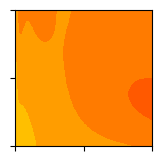

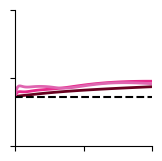

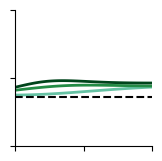

In [76]:
matrix_data_V1, plot_params_V1 = analyze_matrix(RV_1, "infections")

# Create the plot (using unpacked parameters)
fig_R_V_1 = plot_matrix(
    data=matrix_data_V1,
    **plot_params_V1,  # Unpack all the extracted parameters
    cmap=cmaps[0],
    figsize = figsize,
    contour_values = [0.25, 0.5, 0.75],
    xticks = [0,0.5,1],
    yticks = [0,3,6],
    save_path = path_1_V
)

# Plot for fixed homophily values (horizontal slices)
fig1 = plot_slices(
    matrix_data=matrix_data_V1,
    plot_params=plot_params_V1,
    slice_values=[0, 3, 6],  # homophily values 
    slice_dimension="y",
    model_module=SIRV,        # For baseline calculation
    model_params=PARAMS,      # For baseline calculation
    colors=colors_Y,
    output_path="figures/Fig_1/I(pol)_V.pdf",
    figsize = figsize,
)


# Plot for fixed polarization values (vertical slices)
fig2 = plot_slices(
    matrix_data=matrix_data_V1,
    plot_params=plot_params_V1,
    slice_values=[0.1, 0.5, 0.9],  # polarization values
    slice_dimension="x", 
    model_module=SIRV,
    model_params=PARAMS,
    colors=colors_X,
    output_path="figures/Fig_1/I(hom)_V.pdf",
    figsize = figsize,
)